In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [20]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
 
labels = pd.read_csv(r's_data.csv')

In [21]:
labels=labels[['filename','classes']]
labels

for filename, classname in labels.values:
    print(filename,classname)

ca33e037-eaa5-4894-90ac-d9a3b2985219.jpg Failure
67713423-f9e1-4792-8e44-ab2f7240a191.jpg Failure
5f072c9c-8fcd-494d-a995-fa6f215681a7.jpg Failure
59f9eeeb-4be9-4757-9f2e-947569d97f09.jpg Failure
c89bb4e0-2c44-4ca3-ac2b-6ef7732078ad.jpg Failure
63e68025-8a22-41ae-abbf-080ecc3a9894.jpg Failure
acea8e0e-4eba-4d22-9519-611ee0711ee7.jpg Failure
4510bcfb-1a22-4b18-9810-0cd8aea21218.jpg Failure
518e8311-f8ac-4457-aa62-52961e2b51ee.jpg Failure
31d4f79c-c50e-45d3-81ae-be98f975d479.jpg Failure
7c836741-55e1-4b2f-890a-83f72c0c6d42.jpg Failure
1800987c-712f-4b76-8312-d07f43b26f59.jpg Failure
6bf695c8-5268-403b-9ded-bc3edbf69c35.jpg Failure
931f95c5-8ba9-4d3c-93c2-afec3b80589b.jpg Failure
db8bb01b-65d1-4967-acf8-6e91da8ac6c1.jpg Failure
051b5542-7173-4549-b9bf-0afabe847968.jpg Failure
9c70607c-b605-4f23-bb46-04ed5be18808.jpg Failure
a3849830-569e-4def-b91e-40962ed3c5c8.jpg Failure
9f7ee070-3bff-42a9-bfb4-55084828ab85.jpg Failure
9d053163-e22e-418f-9bcf-ec4c8463aaf4.jpg Failure
d364c26f-e9d2-4b96-a

7173dbad-c395-451a-8471-a4d52765a6f1.jpg Failure
16df7ab9-da61-4e59-ab05-961611b1fb79.jpg Failure
469f9b90-2ebf-472c-ad3b-296b4bb1acb0.jpg Failure
d0eeb19d-041b-4fd8-b662-7d939b8d178d.jpg Failure
661e6d79-ec03-4702-8897-203cddc70f8f.jpg Failure
921ba741-11f5-40b0-a42a-c8937bc10595.jpg Failure
1240ca42-92b2-4572-80c3-a4edc8df54e5.jpg Failure
34ea8311-1ff1-4630-98d8-4befeebc3f62.jpg Failure
58281423-8d15-453f-8514-d8bc69cb893c.jpg Failure
86cae1db-f26d-4f39-b7c9-47ecc921137e.jpg Failure
eb839b7b-f62d-4741-8059-323c3a68a824.jpg Failure
981ec5f2-b61d-4337-bbcd-c3ac0ae5f666.jpg Failure
301edf64-7a0b-4389-90fc-0bf13ae9bee0.jpg Failure
c55f17de-715a-4a87-8a31-94c209824686.jpg Failure
c7122bc9-775b-4bfc-822b-8b42a25840a9.jpg Failure
1e8f9678-778d-463c-9553-228d1298b5c6.jpg Failure
8fba7146-b3ab-4a7f-861a-b90d51e27359.jpg Failure
89cb29ad-a56e-4c55-8a55-888115173290.jpg Failure
98bc1a4a-6ed7-4bb0-9282-15d8a050abda.jpg Failure
45ecf3a5-4fde-41ad-ad71-7dac2ce94dbd.jpg Failure
70e7d615-adac-4309-8

2dd78cf7-2441-486c-893c-02d1d172ff50.jpg Failure
6f9e570c-3026-45e5-8909-f1a56a6b2db5.jpg Failure
4ac278e0-1775-4414-9271-80b40998614e.jpg Failure
262a515c-5f66-4f07-ac48-cd504d5f8f48.jpg Failure
064d7267-70bc-4a01-842e-7a5fd3820092.jpg Failure
7361b80c-d78d-4e8a-912a-0f7c96011e40.jpg Failure
20768af7-baa6-4794-b8e9-0ca9455ba631.jpg Failure
b3acc165-d0b3-4baa-abda-cf58ea8b1f5c.jpg Failure
d3720234-01a9-4758-b6f5-db2922fc7dba.jpg Failure
2b09815d-e987-4316-9636-d01e873f5576.jpg Failure
9eb26dc0-d79c-43bb-b30a-ac1dc062ef5a.jpg Non Failure
1d9ae222-746e-4898-b455-b0d82d32453d.jpg Non Failure
6a14eca3-1c40-4f86-93d9-5cf7ddc56130.jpg Non Failure
da5cc628-b95a-495c-9c41-cfbeb3c5a7f1.jpg Non Failure
01b0c0b9-2474-498f-8e16-1cb7e3295e90.jpg Non Failure
01b0c0b9-2474-498f-8e16-1cb7e3295e90.jpg Non Failure
1e3bbdfb-3fd7-4ef2-96d8-cef5af859962.jpg Non Failure
7652de96-615b-4ea9-9bce-302932b15f29.jpg Non Failure
10c889f9-180e-479f-81d3-5794b06b6769.jpg Non Failure
fbd4ea82-afbb-4fdf-8d32-6a312677a

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                  rescale=1./255,
                                  shear_range=0.2,
                                   zoom_range=0.2,
                                    horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

training= train_datagen.flow_from_directory('C:/Users/nx1766/Desktop/image analytics/train',target_size = (256,256),batch_size =32,classes=['Failure','Non Failure'],class_mode = 'categorical',color_mode='grayscale', save_format='jpg')
testing = test_datagen.flow_from_directory('C:/Users/nx1766/Desktop/image analytics/test',target_size = (256,256), batch_size = 32,classes=['Failure','Non Failure',],class_mode = 'categorical',color_mode='grayscale',save_format='jpg')


Found 2362 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


# model without dropout

In [24]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
   # Initialising the CNN
classifier = Sequential()
  # Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape =(256,256,1), activation = 'relu'))
#Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
# Flattening
classifier.add(Flatten())
#full connection
classifier.add(Dense(units=128, activation = 'relu'))
#classifier.add(Dense(output_dim = 5, activation = 'softmax'))
classifier.add(Dense(units= 2, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

history=classifier.fit(training,validation_data=testing,validation_steps=7,epochs=10,steps_per_epoch=64)#training the model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 85, 85, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

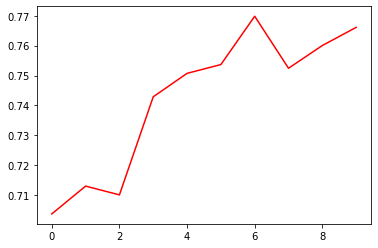

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

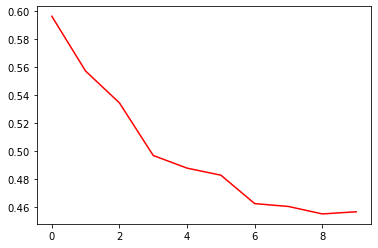

In [7]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

# model-1 with dropout

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
# Create a model with dropout
drop=0.25

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu' , input_shape=(256, 256, 1)))
model1.add(Conv2D(32, (3, 3), activation='relu', ))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', ))
model1.add(Conv2D(64, (3, 3), activation='relu', ))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', ))
model1.add(Dropout(drop))
model1.add(Dense(2, activation='softmax'))

# opt1 = SGD(lr=0.001, momentum=0.9)
# opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 64)       

In [13]:
history1=model1.fit(training,validation_data=testing,validation_steps=16,epochs=10,steps_per_epoch=64)#training the model

Epoch 1/10
64/64 [==============================] - 274s 4s/step - loss: 1.1181 - accuracy: 0.6959 - val_loss: 0.7380 - val_accuracy: 0.5238
Epoch 2/10
64/64 [==============================] - 248s 4s/step - loss: 0.5928 - accuracy: 0.7158
Epoch 3/10
 1/64 [..............................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7188

KeyboardInterrupt: 

In [ ]:
model1.save('/content/drive/MyDrive/picklefiles/trainedmodel/dropout1.h5') #new model

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

# model2

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
drop=0.25
   # Initialising the CNN
classifier = Sequential()
  # Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape =(256,256,1), activation = 'relu'))
#Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

# Flattening
classifier.add(Flatten())
#full connection
classifier.add(Dense(units=512, activation = 'relu'))
model1.add(Dropout(drop))
#classifier.add(Dense(output_dim = 5, activation = 'softmax'))
classifier.add(Dense(units= 2, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

history=classifier.fit(training,validation_data=testing,validation_steps=16,epochs=10,steps_per_epoch=64)#training the model

In [ ]:
classifier.save('/content/drive/MyDrive/picklefiles/trainedmodel/dropout2.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

## model3

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
drop=0.25
   # Initialising the CNN
classifier = Sequential()
  # Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape =(256,256,1), activation = 'relu'))
#Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

# Flattening
classifier.add(Flatten())
#full connection
classifier.add(Dense(units=512, activation = 'relu'))
model1.add(Dropout(drop))
#classifier.add(Dense(output_dim = 5, activation = 'softmax'))
classifier.add(Dense(units= 2, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(classifier.summary())

history=classifier.fit(training,validation_data=testing,validation_steps=16,epochs=20,steps_per_epoch=64)#training the model

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

In [ ]:
classifier.save('/content/drive/MyDrive/picklefiles/trainedmodel/dropout3.h5')